In [1]:
from ml.yolo.YOLO import YOLO
from painting.BBoxesPainter import BBoxesPainter
from masking.MaskGenerator import MaskGenerator

/mnt/work/Uni/Graduation Project/Object Removal/Image-Object-Removal/backend/.venv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = YOLO()

In [3]:
import cv2
image = cv2.imread('test_images/dog2.jpg')

In [4]:
p = model.detect(image)

Ultralytics YOLOv8.0.17 🚀 Python-3.10.6 torch-1.13.1+cu117 CPU
YOLOv8x summary (fused): 268 layers, 68200608 parameters, 0 gradients, 257.8 GFLOPs


In [5]:
p

[BBox(x1=778, y1=557, x2=1196, y2=1398, confidence=0.94703406, label='dog')]

In [6]:
image.shape

(1484, 1920, 3)

In [7]:
image_bbox = BBoxesPainter().paint(image.copy(), p)

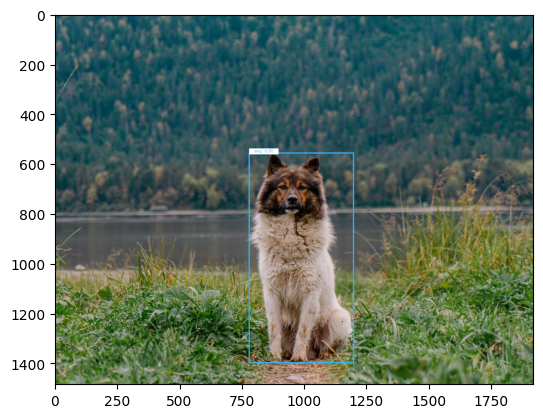

In [8]:
import matplotlib.pyplot as plt
plt.imshow(image_bbox[:,:,::-1])

In [21]:
from typing import Iterable
import cv2 as cv
import numpy as np

from ml.yolo.YOLO import BBox


class MaskGenerator:
    def __init__(self, clearance_ratio: float = 0.1):
        assert clearance_ratio >= 0 and clearance_ratio <= 1
        self.clearance_ratio = clearance_ratio

    def generate(self, image: np.ndarray, bboxes: Iterable[BBox]):
        mask = np.zeros(image.shape[:2], dtype=np.uint8)
        for bbox in bboxes:
            temp_mask = np.zeros(image.shape[:2], dtype=np.uint8)
            background_model = np.zeros((1, 65), np.float64)
            foreground_model = np.zeros((1, 65), np.float64)
            cv.grabCut(image,
                       temp_mask,
                       bbox.scaled(1 + self.clearance_ratio).xywh,
                       background_model,
                       foreground_model,
                       5,
                       cv.GC_INIT_WITH_RECT)
            mask = np.where((temp_mask == cv.GC_FGD)
                            | (temp_mask == cv.GC_PR_FGD)
                            | (mask != 0),
                            255, 0).astype(np.uint8)
        return mask


In [22]:
p

[BBox(x1=778, y1=557, x2=1196, y2=1398, confidence=0.94703406, label='dog')]

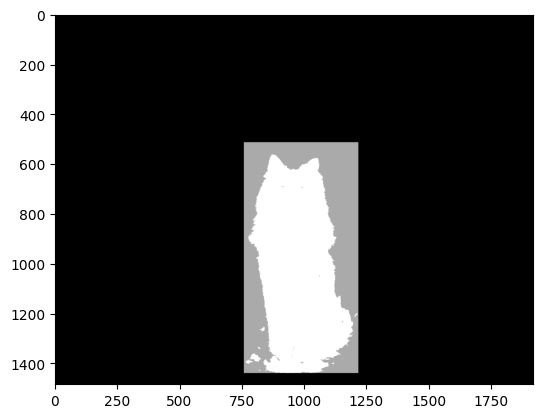

In [23]:
mask = MaskGenerator().generate(image, p)

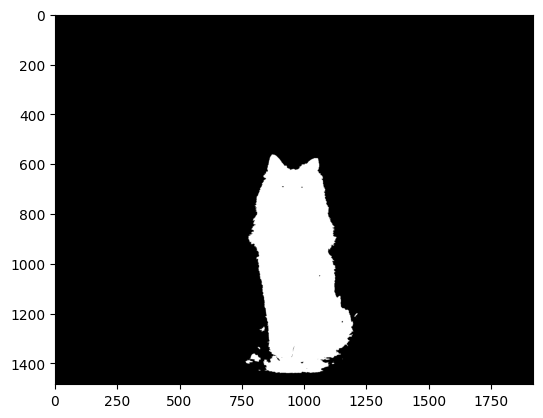

In [24]:
plt.imshow(mask, cmap='gray')